# TASK-Decision Tree & Visualisation


## To Explore Decision Tree Algorithm.For the given ‘Iris’ dataset

Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Author- Sunny Kumar Tripathi

## Step 1: Importing necessary python package

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step 2: Loading/Importing dataset

In [2]:
# Importing here dataset from CSV
df= pd.read_csv('Iris.csv',index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Loading  dataset from Sklearn 
from sklearn.datasets import load_iris
data = load_iris()
df= pd.DataFrame(data.data,columns = data.feature_names)
y = data.target

print(df.head())
print(y[0:5])

Instead of using this data from Sklearn , used CSV file .

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
print( "Shape:",df.shape)
print( "Size",df.size)
print("Columns", df.columns)

Shape: (150, 5)
Size 750
Columns Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [5]:
#unique values in dataset
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [6]:
#Categorical variable structure
print(df['Species'].unique())
df['Species'].value_counts()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
#dataset Dispersion
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


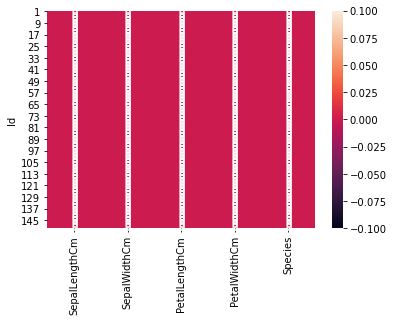

In [8]:
#Data with null values
#df.isnull().sum()
#Heatmap of dataset with null value 

sns.heatmap(df.isnull(),annot=True,xticklabels=True)
plt.show()

# Analyzing Relationships between Variables

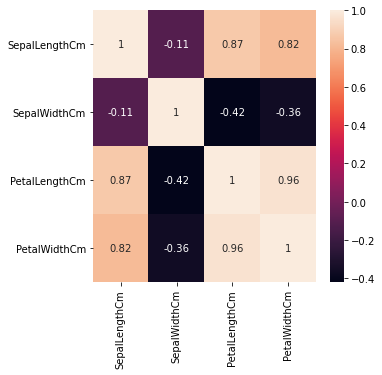

In [9]:
#Heatmap with Correlation of values
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,xticklabels=True,)
plt.show()

# Step 3: Plot & Visualization

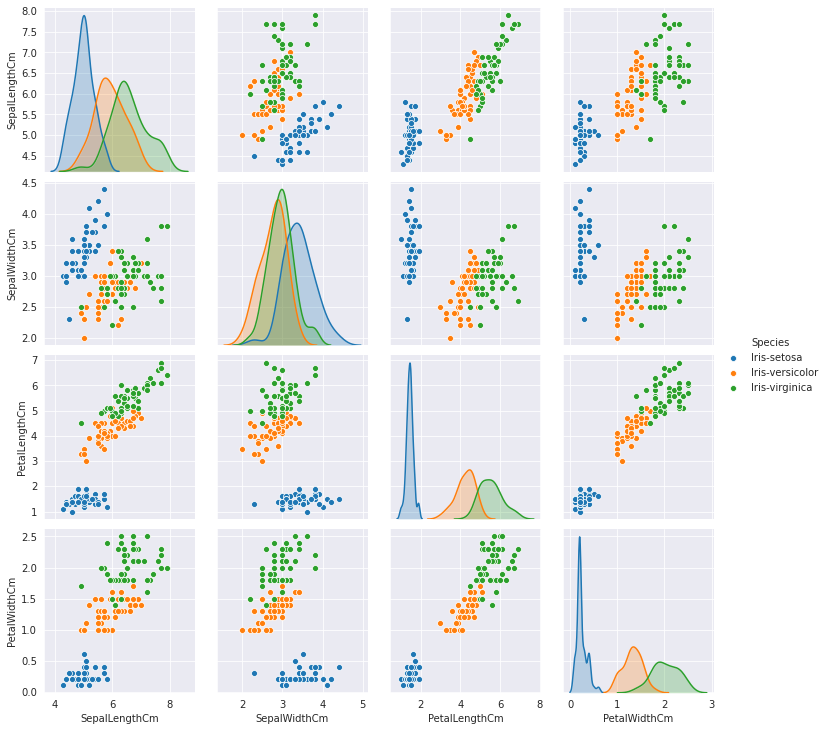

In [10]:
#Using Scatter/pair plot relationship between variables
sns.set_style('darkgrid')
sns.pairplot(df,hue="Species")
plt.show()

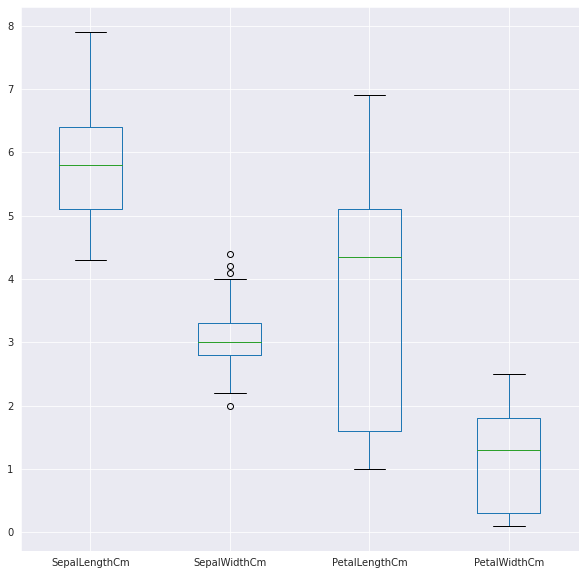

In [11]:
#Checking Outliers
plt.figure(figsize=(10,10))
df.boxplot()
plt.show()


#Little Outliers present in sepalWidth

In [12]:
#Preprocessing , Applying label encoder for labelling target variable

# Import label encoder 
from sklearn import preprocessing 
  
# label encoder "le" object knows how to understand word labels. 
le= preprocessing.LabelEncoder() 
  
# Encode labels in column 'species', 
df['Species']= le.fit_transform(df['Species']) 
  
df['Species'].unique() 



array([0, 1, 2])

## Step 4: Organizing data into training & testing sets

In [13]:
#Defining Features n Label 
X = df.drop(['Species'],axis=1) #Independent variables aka Feature 
y = df['Species']#Dependent variables aka Label
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [14]:
#Train test split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
print('X Train Shape:',X_train.shape)
print('X Test Shape:',X_test.shape)
print('y Train Shape:',y_train.shape)
print('X Test Shape:',y_test.shape)

X Train Shape: (105, 4)
X Test Shape: (45, 4)
y Train Shape: (105,)
X Test Shape: (45,)


## Step 5: Model evaluation & prediction
 
 ## Fit the train data into Model


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)


DecisionTreeClassifier()

In [16]:
#Predicting the scores
y_pred=dtc.predict(X_test) 
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [17]:
# Comparing Actual vs Predicted
df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_predicted

,Actual,Predicted
Id,,
115,2,2
63,1,1
34,0,0
108,2,2
8,0,0
101,2,2
41,0,0
87,1,1
77,1,1


In [18]:
#Accuracy
dtc.score(X_test,y_test)

0.9777777777777777


## Step 6: Performance computation 

In [19]:
# Accuracy For training data
predict = dtc.predict(X_train)
print("Accuracy of training data : ",accuracy_score(predict,y_train)*100,"%")
print("Confusin matrix of training data :'\n' ",confusion_matrix(predict,y_train))

#Overfit case

Accuracy of training data :  100.0 %
Confusin matrix of training data :'
'  [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]


In [20]:
# Accuracy For testing data
predict = dtc.predict(X_test)
print("Accuracy of testing data : ",accuracy_score(predict,y_test)*100,"%")
print("Confusin matrix of testing data :\n ",confusion_matrix(predict,y_test))


Accuracy of testing data :  97.77777777777777 %
Confusin matrix of testing data :
  [[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]


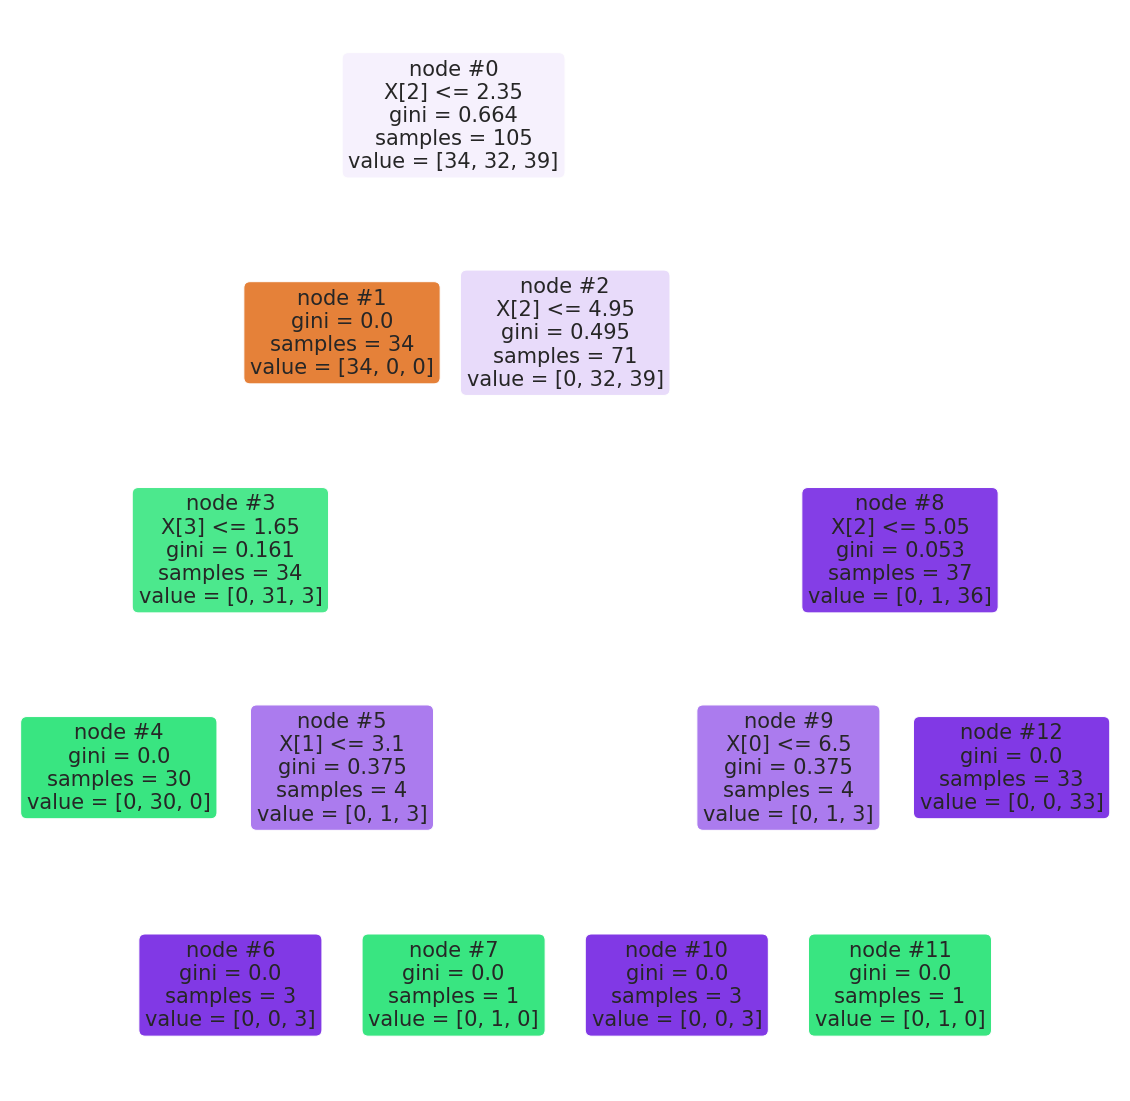

In [21]:
plt.figure(figsize  = (20,20))
tree.plot_tree(dtc,filled=True, rounded=True, node_ids=True)
plt.show()

#Now we Graphy but our dataset is very small and plot_tree work as per requirement.

# SUBMISSION